# MARATONA BEHIND THE CODE 2020

## DESAFIO 2: UNINASSAU

### Desafio desenvolvido por Cinthya Oestreich Silva

### Instalando bibliotecas

In [25]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (0.23.2)


In [26]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\cinth\anaconda3\envs\ml\lib\site-packages (1.2.0)


In [27]:
# Em seguida iremos importar diversas bibliotecas que serão utilizadas:

# Pacote para trabalhar com JSON
import json

# Pacote para realizar requisições HTTP
import requests

# Pacote para exploração e análise de dados
import pandas as pd

# Pacote com métodos numéricos e representações matriciais
import numpy as np

# Pacote para construção de modelo baseado na técnica Gradient Boosting
import xgboost as xgb

# Pacotes do scikit-learn para pré-processamento de dados
# "SimpleImputer" é uma transformação para preencher valores faltantes em conjuntos de dados
from sklearn.impute import SimpleImputer

# Pacotes do scikit-learn para treinamento de modelos e construção de pipelines
# Método para separação de conjunto de dados em amostras de treino e teste
from sklearn.model_selection import train_test_split
# Método para criação de modelos baseados em árvores de decisão
from sklearn.tree import DecisionTreeClassifier
# Classe para a criação de uma pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Pacotes do scikit-learn para avaliação de modelos
# Métodos para validação cruzada do modelo criado
from sklearn.model_selection import KFold, cross_validate

## Download dos conjuntos de dados em formato .csv

In [28]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/maratonadev-br/desafio-2-2020/master/Assets/Data/dataset_desafio_2.csv
df_training_dataset = pd.read_csv(r'train_dataset_uninassau.csv')
df_training_dataset.tail()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
19995,856673,Laércio Mário da Silva,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXATAS
19996,576100,Cibele Quésia Poza,1,1,1,1,0.0,0.0,0.0,NaN,1.0,3,2,5,DIFICULDADE
19997,888739,Marcielle Chale Bape,0,0,0,0,7.9,7.6,8.3,7.2,NaN,8,3,1,EXCELENTE
19998,722743,Suzanne Mirian Mourão,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFICULDADE
19999,417268,Maria Isaiane da Silva Luwequisman,0,0,1,1,7.0,7.3,0.0,0.0,NaN,3,0,6,DIFICULDADE


Temos 15 colunas presentes no dataset fornecido, sendo dezessete delas variáveis características (dados de entrada) e um delas uma variável-alvo (que queremos que o nosso modelo seja capaz de prever). 

As variáveis características são:

    MATRICULA       - número de matrícula do estudante
    NOME            - nome completo do estudante
    REPROVACOES_DE  - número de reprovações na disciplina de ``Direito Empresarial``
    REPROVACOES_EM  - número de reprovações na disciplina de ``Empreendedorismo``
    REPROVACOES_MF  - número de reprovações na disciplina de ``Matemática Financeira``
    REPROVACOES_GO  - número de reprovações na disciplina de ``Gestão Operacional``
    NOTA_DE         - média simples das notas do aluno na disciplina de ``Direito Empresarial`` (0-10)
    NOTA_EM         - média simples das notas do aluno na disciplina de ``Empreendedorismo`` (0-10)
    NOTA_MF         - média simples das notas do aluno na disciplina de ``Matemática Financeira`` (0-10)
    NOTA_GO         - média simples das notas do aluno na disciplina de ``Gestão Operacional`` (0-10)
    INGLES          - variável binária que indica se o estudante tem conhecimento em língua inglesa (0 -> sim ou 1 -> não).
    H_AULA_PRES     - horas de estudo presencial realizadas pelo estudante
    TAREFAS_ONLINE  - número de tarefas online entregues pelo estudante
    FALTAS          - número de faltas acumuladas do estudante (todas disciplinas)
    
A variável-alvo é:

    PERFIL               - uma *string* que indica uma de cinco possibilidades: 
        "EXCELENTE"      - Estudante não necessita de mentoria
        "MUITO BOM"      - Estudante não necessita de mentoria
        "HUMANAS"        - Estudante necessita de mentoria exclusivamente em matérias com conteúdo de ciências humanas
        "EXATAS"         - Estudante necessita de mentoria apenas em disciplinas com conteúdo de ciências exatas
        "DIFICULDADE"    - Estudante necessita de mentoria em duas ou mais disciplinas
        
Com um modelo capaz de classificar um estudante em uma dessas categorias, podemos automatizar parte da mentoria estudantil através de assistentes virtuais, que serão capazes de recomendar práticas de estudo e conteúdo personalizado com base nas necessidades de cada aluno.

### Explorando os dados fornecidos

Podemos continuar a exploração dos dados fornecidos com a função ``info()``:

In [29]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       20000 non-null  int64  
 1   NOME            20000 non-null  object 
 2   REPROVACOES_DE  20000 non-null  int64  
 3   REPROVACOES_EM  20000 non-null  int64  
 4   REPROVACOES_MF  20000 non-null  int64  
 5   REPROVACOES_GO  20000 non-null  int64  
 6   NOTA_DE         20000 non-null  float64
 7   NOTA_EM         20000 non-null  float64
 8   NOTA_MF         20000 non-null  float64
 9   NOTA_GO         16284 non-null  float64
 10  INGLES          16372 non-null  float64
 11  H_AULA_PRES     20000 non-null  int64  
 12  TAREFAS_ONLINE  20000 non-null  int64  
 13  FALTAS          20000 non-null  int64  
 14  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


É notado que existem variáveis do tipo ``float64`` (números "decimais"), variáveis do tipo ``int64`` (números inteiros) e do tipo ``object`` (nesse caso são *strings*, ou texto). 

Como a maioria dos algoritmos de aprendizado estatístico supervisionado só aceita valores numéricos como entrada, é necessário então o pré-processamento das variáveis do tipo "object" antes de usar esse dataset como entrada para o treinamento de um modelo. Também é notado que existem valores faltantes em várias colunas. Esses valores faltantes também devem ser tratados antes de serem construídos modelos com esse conjunto de dados base.

A função ``describe()`` gera várias informações sobre as variáveis numéricas que também podem ser úteis:

In [30]:
df_training_dataset.describe()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,16372.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,0.646286,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,0.478136,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,0.000000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,1.000000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,1.000000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,1.000000,25.000000,7.000000,8.000000


### Visualizações

Para visualizar o dataset fornecido, podemos utilizar as bibliotecas ``matplotlib`` e ``seaborn``:

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

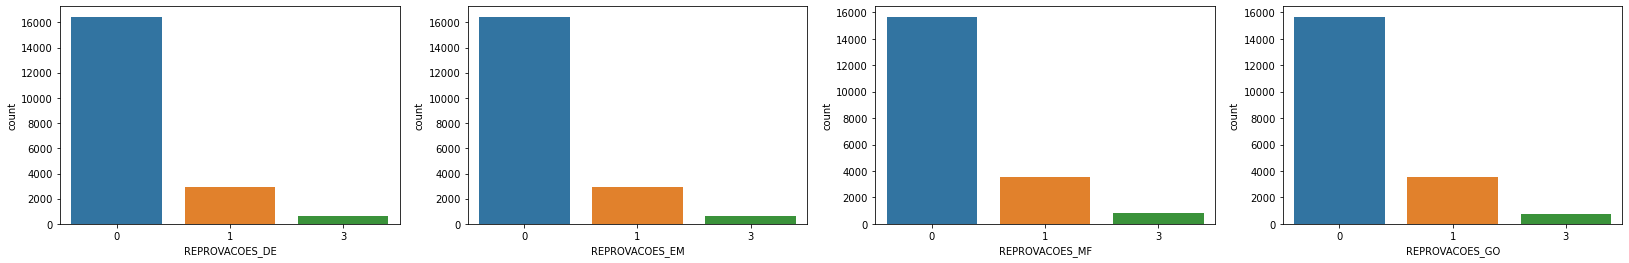

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='REPROVACOES_DE', data=df_training_dataset)
sns.countplot(ax=axes[1], x='REPROVACOES_EM', data=df_training_dataset)
sns.countplot(ax=axes[2], x='REPROVACOES_MF', data=df_training_dataset)
sns.countplot(ax=axes[3], x='REPROVACOES_GO', data=df_training_dataset)

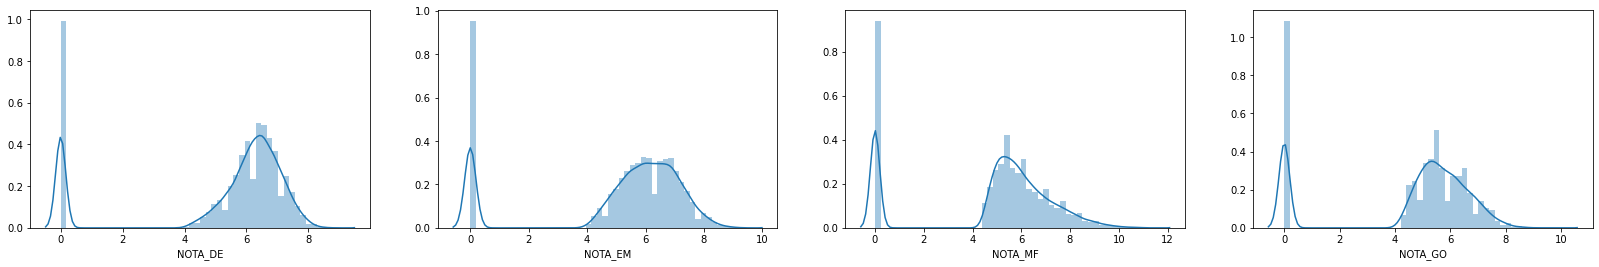

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.distplot(df_training_dataset['NOTA_DE'], ax=axes[0])
sns.distplot(df_training_dataset['NOTA_EM'], ax=axes[1])
sns.distplot(df_training_dataset['NOTA_MF'], ax=axes[2])
sns.distplot(df_training_dataset['NOTA_GO'].dropna(), ax=axes[3])

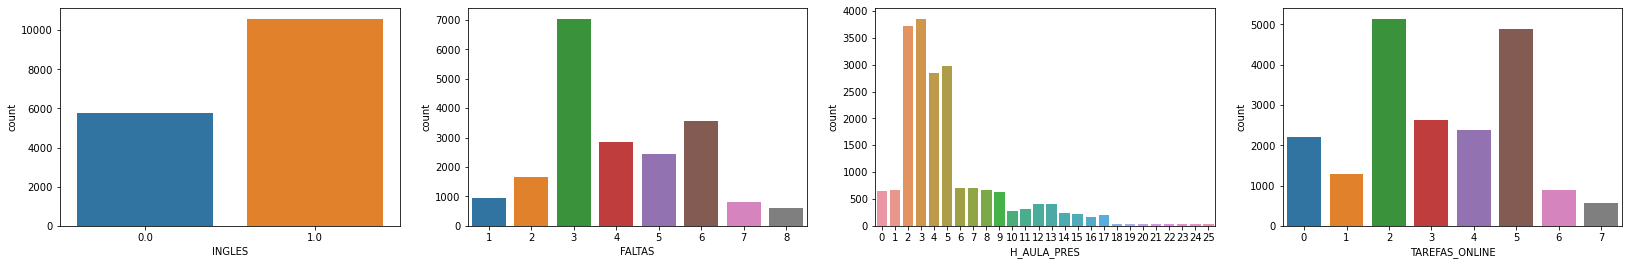

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='INGLES', data=df_training_dataset)
sns.countplot(ax=axes[1], x='FALTAS', data=df_training_dataset)
sns.countplot(ax=axes[2], x='H_AULA_PRES', data=df_training_dataset)
sns.countplot(ax=axes[3], x='TAREFAS_ONLINE', data=df_training_dataset)

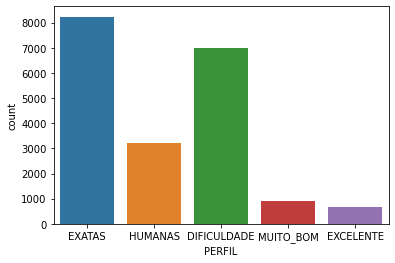

In [35]:
fig = plt.plot()
sns.countplot(x='PERFIL', data=df_training_dataset)

In [36]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [37]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

MATRICULA            0
NOME                 0
REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64



In [38]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

MATRICULA            0
NOME                 0
REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
INGLES            3628
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

MATRICULA         0
NOME              0
REPROVACOES_DE    0
REPROVACOES_EM    0
REPROVACOES_MF    0
REPROVACOES_GO    0
NOTA_DE           0
NOTA_EM           0
NOTA_MF           0
NOTA_GO           0
INGLES            0
H_AULA_PRES       0
TAREFAS_ONLINE    0
FALTAS            0
PERFIL            0
dtype: int64



### Deletando colunas

In [40]:
df_training_dataset_imputed.tail()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
19995,856673,Laércio Mário da Silva,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXATAS
19996,576100,Cibele Quésia Poza,1,1,1,1,0.0,0.0,0.0,0.0,1.0,3,2,5,DIFICULDADE
19997,888739,Marcielle Chale Bape,0,0,0,0,7.9,7.6,8.3,7.2,0.0,8,3,1,EXCELENTE
19998,722743,Suzanne Mirian Mourão,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFICULDADE
19999,417268,Maria Isaiane da Silva Luwequisman,0,0,1,1,7.0,7.3,0.0,0.0,0.0,3,0,6,DIFICULDADE


In [46]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['MATRICULA','NOME'], inplace=False)
#'REPROVACOES_DE', 'REPROVACOES_EM', "REPROVACOES_MF", "REPROVACOES_GO"

In [47]:
df_training_dataset_rmcolumns.tail()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
19995,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXATAS
19996,1,1,1,1,0.0,0.0,0.0,0.0,1.0,3,2,5,DIFICULDADE
19997,0,0,0,0,7.9,7.6,8.3,7.2,0.0,8,3,1,EXCELENTE
19998,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFICULDADE
19999,0,0,1,1,7.0,7.3,0.0,0.0,0.0,3,0,6,DIFICULDADE


In [48]:
df_training_dataset_rmcolumns.tail()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
19995,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXATAS
19996,1,1,1,1,0.0,0.0,0.0,0.0,1.0,3,2,5,DIFICULDADE
19997,0,0,0,0,7.9,7.6,8.3,7.2,0.0,8,3,1,EXCELENTE
19998,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFICULDADE
19999,0,0,1,1,7.0,7.3,0.0,0.0,0.0,3,0,6,DIFICULDADE


#### Definindo as features do modelo

In [49]:
df_training = df_training_dataset_rmcolumns
df_training.columns

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'INGLES', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS', 'PERFIL'],
      dtype='object')

In [50]:
features = df_training[
    [
        'REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'INGLES', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS'
    ]
]
target = df_training['PERFIL']

### Neste desafio eu utilizei o Auto ML Pycaret para verificar se existia algum modelo mais interessante do que eu havia escolhido. Eu escolhi inicialmente o Random Forest. 
### https://pycaret.org/

In [51]:
from pycaret.datasets import get_data
from pycaret import classification

classification_setup = classification.setup(data=df_training, target='PERFIL')
#classification_dt = classification.create_model('rf')
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.8129,0.0000,0.6626,0.8016,0.7992,0.7219,0.7267,7.0964
1,Light Gradient Boosting Machine,0.8073,0.0000,0.6496,0.7961,0.7952,0.7137,0.7180,0.7071
2,CatBoost Classifier,0.8041,0.0000,0.6498,0.7937,0.7927,0.7088,0.7128,9.8243
3,Extreme Gradient Boosting,0.7993,0.0000,0.6465,0.7892,0.7889,0.7020,0.7056,2.8680
4,Random Forest Classifier,0.7886,0.0000,0.6331,0.7733,0.7767,0.6861,0.6882,0.1173
5,Linear Discriminant Analysis,0.7855,0.0000,0.6443,0.7980,0.7720,0.6783,0.6951,0.0718
6,Logistic Regression,0.7781,0.0000,0.5883,0.7666,0.7637,0.6671,0.6732,0.4596
7,Extra Trees Classifier,0.7756,0.0000,0.6131,0.7673,0.7643,0.6639,0.6694,0.3901
8,Ridge Classifier,0.7378,0.0000,0.4670,0.7136,0.7054,0.5962,0.6179,0.0226
9,K Neighbors Classifier,0.7373,0.0000,0.5758,0.7276,0.7264,0.6041,0.6088,0.1199


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8302, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Como o desafio possui uma base com as classes desabalanceadas eu utilizei o smote. 
### Neste caso eu apliquei o smote para toda a base. Pode se dizer que não é a melhor prática uma vez que devemos preservar o X e Y teste e aplicar o smote apenas no X e Y train para preservar a análise de acurácia, F1 Score etc.

In [52]:
#Smote
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(features, target)

In [53]:
# Separação dos dados em um conjunto de treino e um conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=337)

<hr>

#### Criando vários modelos para verificar qual o melhor. Originalmente eu realizei esta parte antes do Pycaret. Depois desta análise inseri o Pycaret. 

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn import svm, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix


#dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)

rng = np.random.RandomState(123)

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=6, p=2,
 weights='uniform')

#mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(1000), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
#rf = RandomForestClassifier(criterion ='entropy', min_samples_split = 6, n_estimators=100, random_state=0)
#rf = RandomForestClassifier(max_features = 'auto', criterion ='entropy', min_samples_split = 6, n_estimators=1000, random_state=50, oob_score = True)
#rf = RandomForestClassifier(max_features = 'auto',max_depth= 8 ,criterion ='entropy', n_estimators=200, random_state=50, oob_score = True)
rf = RandomForestClassifier(max_features = 'auto', n_estimators=1000)

# parameters for SVM

#linear_svc = svm.SVC(kernel='linear')
'''
rbf_svc = svm.SVC(C=6.7046885962229785, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.004147722987833689,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)'''
'''
rbf_svc = svm.SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)'''

''''
rbf_svc=svm.SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)'''

'''
xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                      min_child_weight=1)'''
# antes max_depht = 4


bc= BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=4)) 
ab=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=100))

gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8302, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


cb = VotingClassifier(estimators=[('RandonFlorest', rf), ('KNN', knn)], voting='soft')

titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'RF', 'RF+KNN' , 'GBC' ]
methods = [lr, dt, knn, nb ,rf, cb, gbc]

#### Testando o classificador baseado em árvore de decisão

In [59]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))

Classification accuracy LogisticRegresson = 0.6933171324422843
Classification accuracy DecisionTree = 0.7891859052247874
Classification accuracy KNN = 0.8297691373025516
Classification accuracy NaiveBayes = 0.5173754556500607
Classification accuracy RF = 0.8851761846901579
Classification accuracy RF+KNN = 0.883232077764277
Classification accuracy GBC = 0.772782503037667


#### Execução de predições e avaliação da árvore de decisão

LogisticRegresson
                 0         1         2         3         4
F1-Score  0.803619  0.763230  0.764290  0.665606  0.467461
Precisão  0.909022  0.699850  0.734012  0.685003  0.472806
Recall    0.720120  0.839232  0.797173  0.647277  0.462236


DecisionTree
                 0         1         2         3         4
F1-Score  0.766288  0.750605  0.870122  0.799500  0.760817
Precisão  0.762641  0.757483  0.863279  0.807062  0.756724
Recall    0.769970  0.743851  0.877074  0.792079  0.764955


KNN
                 0         1         2         3         4
F1-Score  0.799153  0.734488  0.925338  0.833962  0.848984
Precisão  0.804997  0.773210  0.886761  0.847826  0.827784
Recall    0.793393  0.699460  0.967425  0.820545  0.871299


NaiveBayes
                 0         1         2         3         4
F1-Score  0.748416  0.017442  0.748834  0.450257  0.456450
Precisão  0.986248  0.283019  0.711911  0.344488  0.392021
Recall    0.603003  0.008998  0.789797  0.649752  0.546224


RF

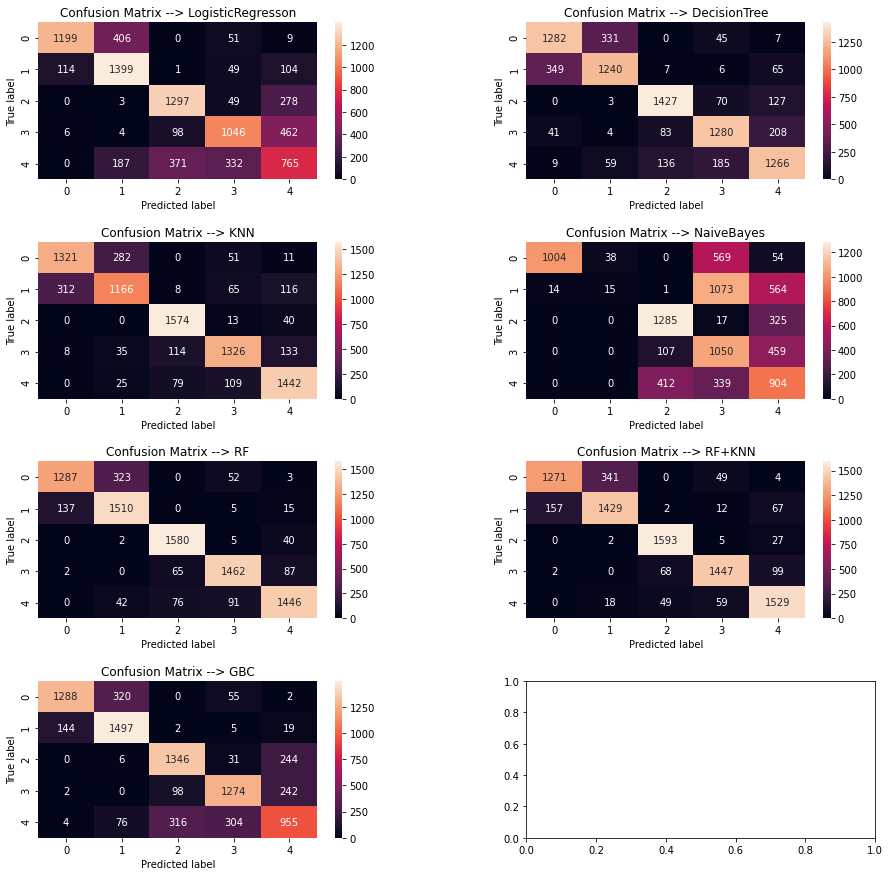

<Figure size 432x288 with 0 Axes>

In [60]:
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

fig3, sub1 = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['0','1','2','3','4' ] 
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "01234"],
                  columns = [i for i in "01234"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    print(df)
    print('\n')

plt.show()
plt.tight_layout()

## Conclusão 
### Podemos perceber que no pycaret o escolhido foi Gradiente Boosting. 
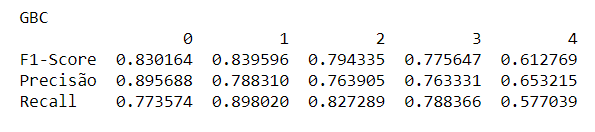
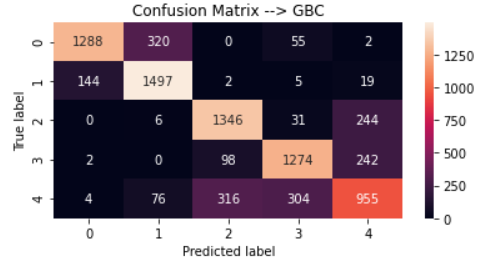

### Porem comporando com o Random Forest podemos perceber que este modelo foi melhor.
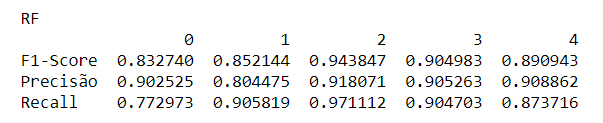
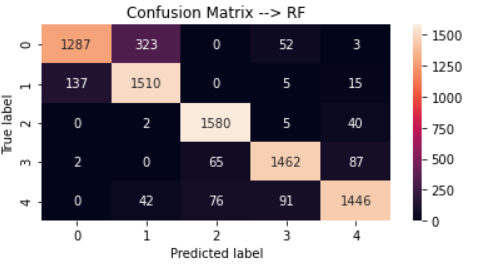

### Como este desafio era de classificação não me preocupei tanto em qual classe era melhor e sim se todas as classes estavam sendo classificadas adequadamente. 

## <hr>

## Scoring dos dados necessários para entregar a solução
## A proxima parte era necessária para a entrega da solução. Abaixo depois de escolher o Random Forest como meu modelo eu o utilizei no dataset de teste. 

### Download da "folha de respostas"

In [47]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-uninassau/master/to_be_scored_uninassau.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_uninassau.csv')
df_to_be_scored.tail()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
495,940576,Samuel Bahia Cranulunan,0,0,0,0,6.3,5.3,7.0,5.6,1,4,0,8
496,682956,Samuel de Linhares,0,0,0,0,5.7,5.9,5.8,5.0,1,1,1,6
497,850896,Gigi Olga de Oliveira,0,0,0,0,6.7,7.1,5.7,6.3,0,16,6,3
498,525876,Marta Oaman,0,0,0,0,6.7,7.2,5.2,5.7,1,10,3,5
499,867666,Eliel Jardel da Costa Sanches,0,0,0,0,7.1,6.8,6.5,6.0,1,5,3,6


In [48]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       500 non-null    int64  
 1   NOME            500 non-null    object 
 2   REPROVACOES_DE  500 non-null    int64  
 3   REPROVACOES_EM  500 non-null    int64  
 4   REPROVACOES_MF  500 non-null    int64  
 5   REPROVACOES_GO  500 non-null    int64  
 6   NOTA_DE         500 non-null    float64
 7   NOTA_EM         500 non-null    float64
 8   NOTA_MF         500 non-null    float64
 9   NOTA_GO         500 non-null    float64
 10  INGLES          500 non-null    int64  
 11  H_AULA_PRES     500 non-null    int64  
 12  TAREFAS_ONLINE  500 non-null    int64  
 13  FALTAS          500 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 54.8+ KB


Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [49]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
#df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored
    ),
    columns=df_to_be_scored.columns
)

# 3 - Remoção de colunas
df_to_be_scored_4 = df_to_be_scored_2.drop(columns=['MATRICULA','NOME'], inplace=False)

# 4 - Encoding com "dummy variables"
#df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao'])

df_to_be_scored_4.tail()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
495,0,0,0,0,6.3,5.3,7.0,5.6,1,4,0,8
496,0,0,0,0,5.7,5.9,5.8,5.0,1,1,1,6
497,0,0,0,0,6.7,7.1,5.7,6.3,0,16,6,3
498,0,0,0,0,6.7,7.2,5.2,5.7,1,10,3,5
499,0,0,0,0,7.1,6.8,6.5,6.0,1,5,3,6


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [50]:
df_to_be_scored_4.columns

Index(['REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF', 'REPROVACOES_GO',
       'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO', 'INGLES', 'H_AULA_PRES',
       'TAREFAS_ONLINE', 'FALTAS'],
      dtype='object')

### Executando as predições na "folha de respostas"

In [51]:
y_pred = rf.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,target
495,0,0,0,0,6.3,5.3,7.0,5.6,1,4,0,8,HUMANAS
496,0,0,0,0,5.7,5.9,5.8,5.0,1,1,1,6,DIFICULDADE
497,0,0,0,0,6.7,7.1,5.7,6.3,0,16,6,3,EXATAS
498,0,0,0,0,6.7,7.2,5.2,5.7,1,10,3,5,EXATAS
499,0,0,0,0,7.1,6.8,6.5,6.0,1,5,3,6,EXATAS


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [53]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_3.to_csv(index=False))
df_to_be_scored_4.to_csv("results.csv")

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://uninassau.maratona.dev
